# <center>Laboratory 5<br>Computing methods</center>

Instruction:
All the exercises from the laboratory must be implemented in [Spyder] (https://www.spyder-ide.org/). The report must be sent in [Jupyter Notebook] (https://jupyter-notebook.readthedocs.io/en/stable/)  

***Exercise 1.***  
Create the set of 1000 points equal distance at the range \[-1,1\] to verification interpolation result.  
  
Define interpolation Chebyshev nodes as:  
  
$x(k) = \cos\left(\cfrac{k\pi}{n}\right)\ k = 1,2,...,n$

In [98]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
N=13
uniform_points = np.linspace(-1,1,N)
def chebyshev(n):
    n = n+1
    return np.array([math.cos((k*math.pi)/n) for k in range(1, n)])
def show_chebyshev_nodes(N):
    plt.figure(figsize=(12,3))
    plt.grid()
    plt.plot(chebyshev(N), np.ones(N), 'o')
    plt.show()
interact(show_chebyshev_nodes, N=widgets.IntSlider(min=1,max=15,step=1,value=10))

interactive(children=(IntSlider(value=10, description='N', max=15, min=1), Output()), _dom_classes=('widget-in…

<function __main__.show_chebyshev_nodes(N)>

***Exercise 2.***  
Define function:  

1. Non-differential continuous function: $f(x)=\mathrm{sgn}(x)x + x^2 $
2. A differentiable function once: $f(x)=\mathrm{sgn}(x)x^{2} $
3. A differentiable function three times: $f(x)=|\sin(5x)|^3 $
4. Three analytic functions: $ f(x) = \cfrac{1}{1 + ax ^ 2}$ for $a\in\{1,25,100\} $
5. Non-continuous function: $ f(x) = \mathrm{sgn}(x) $


In [2]:
def non_differential(x):
    return np.sign(x)*x + x**2
def differentiable(x):
    return np.sign(x)*x**2
def differentiable_3_times(x):
    return np.abs(np.sin(5*x))**3
def analytic_fun_1(x):
    return 1/(1+x**2)
def analytic_fun_2(x):
    return 1/(1+25*x**2)
def analytic_fun_3(x):
    return 1/(1+100*x**2)
def non_continous(x):
    return np.sign(x)

***Exercise 3.***  
For continuous non-differential function from Ex.2, using the [barycentric method](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) to interpolation then. You can use *[barycentric_interpolate](https: //docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* from the *[Scipy] 
(https://scipy.org/)*.  
  
Make the interpolation on the order of 10, 100, 1000, 10000 at Chebyshev nodes. Calculate the values of the interpolation polynomial in equidistant 1000 points.

Plot graphs showing the results of interpolation (graph of the original function and function interpolating in 1000 points).

Analyze the calculation time depending on the interpolation order.

***Tip:*** Using the *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* for $ f ( x) = cos (x) + x ^ 2 $ illustrates the example:

0.009821891784667969


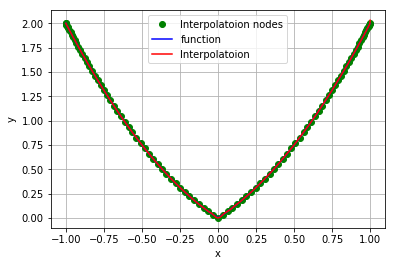

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate
import time
# coordinate vector x for which we want to calculate the values of the interpolation polynomial
x = np.linspace(-1,1,1000)
# origin function
# f = lambda x: np.cos(x)+x**2
f = non_differential
# Chebyshev nodes 
interpolation_nods_number = 100
def cheb_nodes(interpolation_nods_number):
    return np.cos(np.linspace(1,interpolation_nods_number,interpolation_nods_number)*np.pi/interpolation_nods_number)
xch = cheb_nodes(interpolation_nods_number)
start = time.time()
# barycentric interpolate
yimp = barycentric_interpolate(xch,f(xch),x)
end = time.time()
print(end - start)


plt.plot(xch,f(xch),'go',label = 'Interpolatoion nodes')
plt.plot(x,f(x),'b',label = 'function')
plt.plot(x,yimp,'r',label = 'Interpolatoion')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

In [113]:
a = cheb_nodes(1000)

***Exercise 4.***
To assess the quality of interpolation, the vector norm $ l _ {\ infty} $ is used, for the vector difference we define it as:
  
$||\mathbf{x}_1-\mathbf{x}_2|| = \sup\{|\mathbf{x_1} - \mathbf{x_2}|\} $
  
Implement the $l_{\ infty} $ standard.


***Exercise 5.***
For a function once and three times differentiable from Ex.2. Examine the interpolation quality in the loop for the different interpolation orders of $n$.  
To do this, calculate the value of the interpolation function and polynomial in 1000 points and calculate the difference standard of these vectors (error norm) for each tested row. The maximum row should be taken when the error is at the machine zero level.  
For each function, prepare a graph in a double logarithmic scale (both axes), in which the axis of the arguments is the interpolation row and the value axis is the corresponding error norm.  
For comparison, place in the chart an additional graph $n ^ {- v} $, where $ v $ is the order of the highest derivative of the function .


***Exercise 6.***
Perform a similar analysis for analytic functions from Ex.2. The chart should be made on a logarithmic scale (only the y-axis).   
For comparison, put in the chart an additional estimate chart for interpolation of analytic functions. To do this, calculate the maximum of the function between $[- 1,1]$ and the largest ellipse, with foci in the points $(-1,j0)$ and $(1, j0)$, which does not contain the roots of the function denominator.

***Exercise 7.***
For a discontinuous function fromEx.2., analyze the Gibbs effect separately for even and odd $n$. Separately calculate what is the minimum error independent of the row. Why do the values for even and odd $n$ differ?
***Tip:*** Make a graph of the function and its interpolative function.
 
Prześlij opinię
Historia
Zapisano
Społeczność

# Exercise 4

In [4]:
def l_inf(x1, x2):
    return np.max(np.abs(x1-x2))

# Exercise 5

1.1063394562467e-06


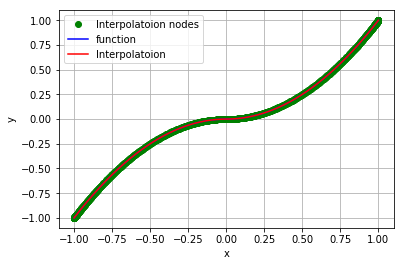

In [5]:
interpolation_nods_number = 1000
x = np.linspace(-1,1,interpolation_nods_number)
xch = cheb_nodes(800)
#once
function_values = differentiable(x)
interpolated = barycentric_interpolate(xch,differentiable(xch),x)
print(l_inf(function_values, interpolated))

plt.plot(xch,differentiable(xch),'go',label = 'Interpolatoion nodes')
plt.plot(x,differentiable(x),'b',label = 'function')
plt.plot(x,interpolated,'r',label = 'Interpolatoion')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

In [55]:
import sys
interpolation_nods_number = 1000
x = np.linspace(-1,1,interpolation_nods_number)
def get_errors_vect(function_ptr, limit):
    function_values = function_ptr(x)
    epsilons = []
    for n in range(1, limit):
        xch = cheb_nodes(n)
        interpolation_values = barycentric_interpolate(xch,function_ptr(xch),x)
        epsilons.append(l_inf(interpolation_values, function_values))
    return epsilons

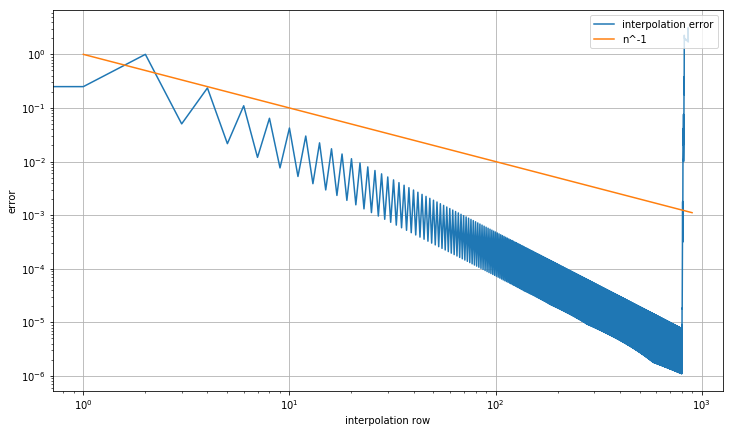

In [107]:
limit = 900
plt.figure(figsize=(12,7))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('interpolation row')
plt.ylabel('error')
plt.grid()
plt.plot(get_errors_vect(differentiable, limit))
n = np.arange(1, limit,dtype=np.float)
plt.plot(n, n**-1)
plt.legend(['interpolation error', 'n^-1'], loc = 1)
plt.show()

/home/kacper/anaconda3/lib/python3.6/site-packages/scipy/interpolate/polyint.py:513: RuntimeWarning: divide by zero encountered in reciprocal
  self.wi **= -1
/home/kacper/anaconda3/lib/python3.6/site-packages/scipy/interpolate/polyint.py:609: RuntimeWarning: invalid value encountered in true_divide
  p = np.dot(c,self.yi)/np.sum(c,axis=-1)[...,np.newaxis]
/home/kacper/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


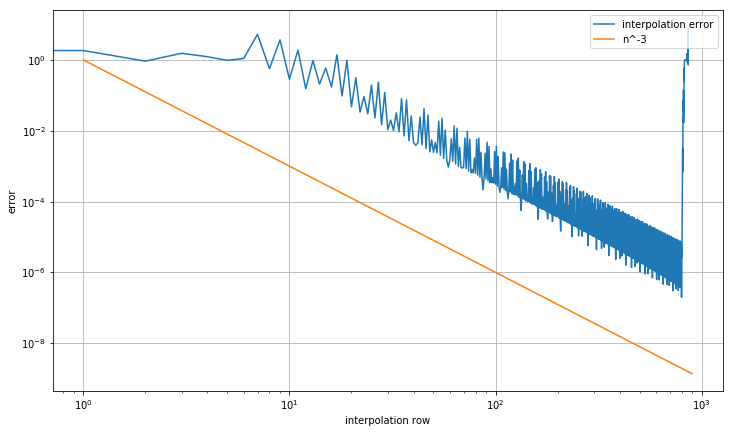

In [114]:
limit = 900
plt.figure(figsize=(12,7))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('interpolation row')
plt.ylabel('error')
plt.plot(get_errors_vect(differentiable_3_times,limit))
n = np.arange(1, limit,dtype=np.float)
plt.plot(n, n**-3)
plt.legend(['interpolation error', 'n^-3'], loc = 1)
plt.grid()
plt.show()

Both functions do not reach the zero error value of the machine. The error becomes steadily smaller for (about) the first 800 n. Surprisingly, for bigger n the functions becomes numeric unstable and we get a error Nan for n about 864.

# Exercise 6

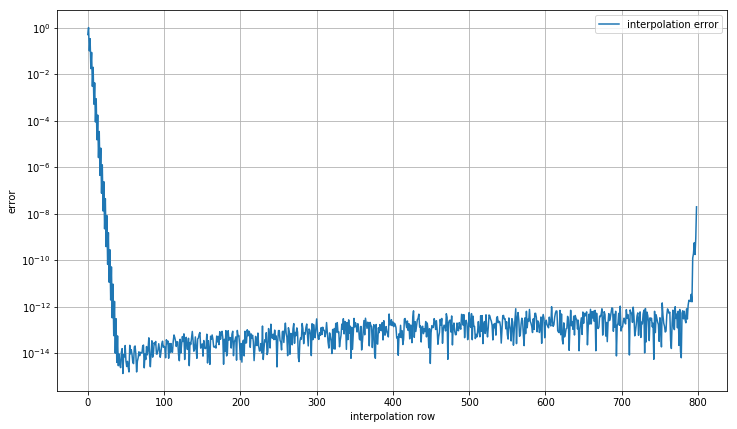

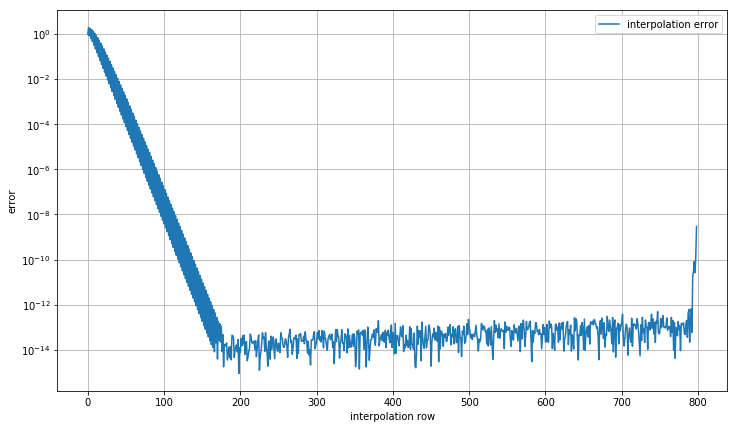

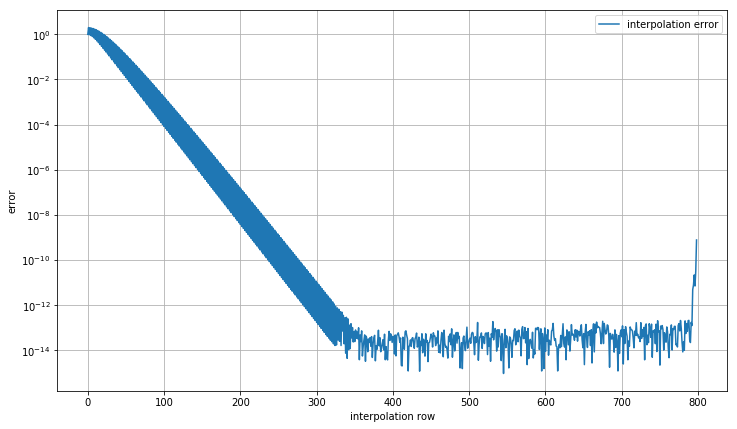

In [116]:
analytic_functions = (analytic_fun_1, analytic_fun_2, analytic_fun_3)
for function in analytic_functions:
    limit = 800
    plt.figure(figsize=(12,7))
    plt.yscale('log')
    plt.xlabel('n')
    plt.ylabel('error')
    plt.plot(get_errors_vect(function,limit))
    plt.legend(['interpolation error'], loc = 1)
    plt.grid()
    plt.show()

# Exercise 7

In [82]:
interpolation_nods_number = 1000
x = np.linspace(-1,1,interpolation_nods_number)
def show_gibbs_effect(n):
    xch = cheb_nodes(n)
    #once
    function_values = non_continous(x)
    interpolated = barycentric_interpolate(xch,non_continous(xch),x)
    print(l_inf(function_values, interpolated))
    plt.figure(figsize=(12,7))
    plt.plot(xch,non_continous(xch),'go',label = 'Interpolatoion nodes')
    plt.plot(x,non_continous(x),'b',label = 'function')
    plt.plot(x,interpolated,'r',label = 'Interpolatoion')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.ylim(-1.5, 1.5)
    plt.legend(loc = 0)
    plt.grid()
    plt.show()

In [88]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
print("odd n")
interact_manual(show_gibbs_effect, n=widgets.IntSlider(min=1,max=1000,step=2,value=9))

odd n


interactive(children=(IntSlider(value=9, description='n', max=1000, min=1, step=2), Button(description='Run In…

<function __main__.show_gibbs_effect(n)>

In [89]:
print("even n")
interact_manual(show_gibbs_effect, n=widgets.IntSlider(min=2,max=1000,step=2,value=10))

even n


interactive(children=(IntSlider(value=10, description='n', max=1000, min=2, step=2), Button(description='Run I…

<function __main__.show_gibbs_effect(n)>

1.9999999999999976


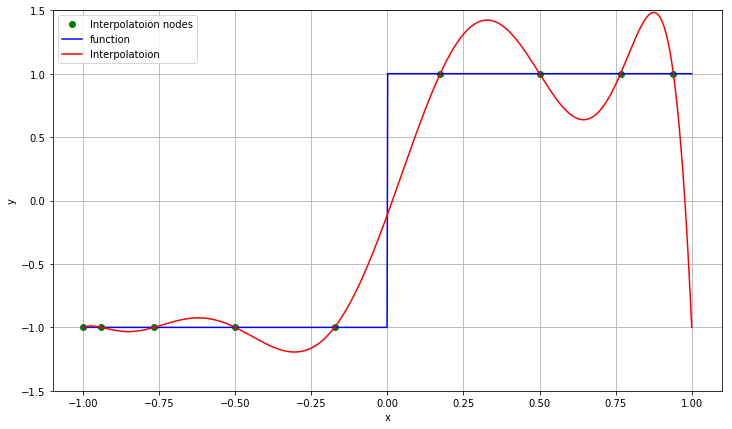

2.0000000000000004


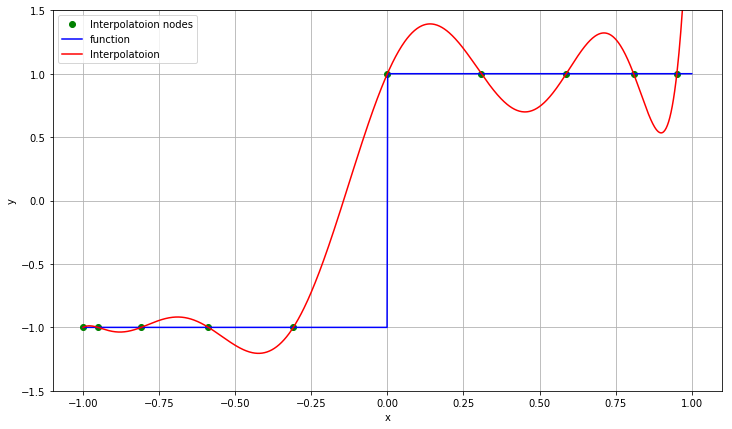

In [103]:
show_gibbs_effect(9)
show_gibbs_effect(10)

As we can see in the above graph, for odd N there are two nodes equally distant (non-zero distance) from the argument in which there is a discontinuity. For even N we get the node exactly for the mentioned x. Maybe Gibbs effect is less visible for the odd n. But the l infinity norm is similar for both cases.

Supplementary materials:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Uncle  Google](https://google.pl) i [auntie Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)